<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture-12-Working-on-NN-earlystopping-class-using-keras/earlystopping_class_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Purpose:**

The code demonstrates how to build and train a simple feedforward neural network using TensorFlow Keras for binary classification. It uses a synthetic dataset generated by make_circles to illustrate the model's ability to learn non-linear decision boundaries.

**Data Generation and Visualization:**

A synthetic dataset with a circular pattern is created using make_circles. This dataset has two features and a binary target variable. A scatter plot is generated using Seaborn to visualize the distribution of the data points and their corresponding classes.

**Model Building and Training:**

A Sequential Keras model is constructed with two dense layers using the ReLU activation function and an output layer with a sigmoid activation function, which is suitable for binary classification. The model is compiled with the binary_crossentropy loss function and the adam optimizer. The model is then trained on the generated data for a fixed number of epochs.

**Evaluation and Visualization of Results:**

The training and validation loss over the epochs are plotted to observe the model's learning progress and potential overfitting. The plot_decision_regions function from mlxtend is used to visualize the decision boundary learned by the trained model on the test data.

**Introduction of Early Stopping:**

The code then introduces the concept of Early Stopping as a technique to prevent overfitting. A new model is built and compiled. An EarlyStopping callback is defined to monitor the validation loss and stop training if there is no significant improvement for a specified number of epochs (patience). The model is then trained again with this callback, and the training/validation loss and decision regions are plotted to show the effect of Early Stopping.

# Importing all important libraries

In [17]:
# # Importing all important libraries
# Import TensorFlow for building and training neural networks
# Import NumPy for numerical operations
# Import Pandas for data manipulation and analysis (not used in this specific example, but often useful)
# Import rcParams from pylab for customizing Matplotlib plot parameters
# Import Matplotlib for plotting graphs
# Import warnings to manage warnings (not used in this specific example)
# Import plot_decision_regions from mlxtend for visualizing decision boundaries
# Import ListedColormap from Matplotlib for creating custom
# Import Sequential model from TensorFlow Keras
# Import Dropout layer from TensorFlow Keras (not used in this specific example, but often useful for regularization)
# Import Dense layer from TensorFlow Keras for creating fully connected layers
# Import EarlyStopping callback from TensorFlow Keras for preventing overfitting
# Import train_test_split from scikit-learn for splitting data
# Import make_circles from scikit-learn to generate a synthetic
# Import Seaborn for enhanced data visualization

import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns


# Creating a Data

In [18]:
# Generate a synthetic dataset with two features and a circular pattern
# n_samples: number of samples to generate
# noise: standard deviation of the Gaussian noise
# random_state: seed for reproducibility

x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# Ploting a Data

<Axes: >

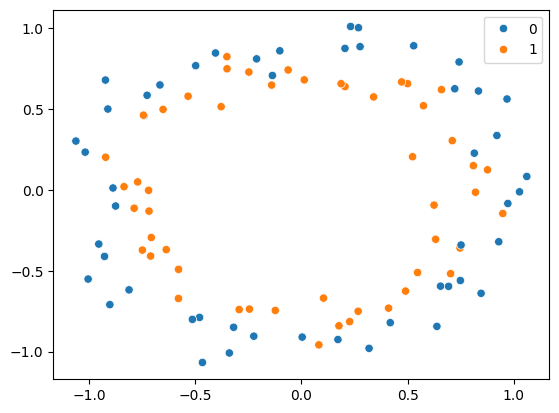

In [19]:
# Create a scatter plot of the generated data
# x[:, 0]: first feature
# x[:, 1]: second feature
# hue: color points based on the target variable y

sns.scatterplot( x = x[:,0], y = x[:,1], hue = y)

In [20]:
# Split the data into training and testing sets
# test_size: proportion of the dataset to include in the test split
# random_state: seed for reproducibility

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)


In [21]:
# Build a sequential model
# Add a dense layer with 128 units and ReLU activation, specifying the input dimension
# Add another dense layer with 128 units and ReLU activation
# Add the output layer with 1 unit and sigmoid activation for binary classification

model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the model
# loss: binary_crossentropy is suitable for binary classification
# optimizer: adam is a common and effective optimizer
# metrics: accuracy is used to evaluate the model's performance

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Train the model
# x_train, y_train: training data
# validation_data: data to evaluate the model on after each epoch
# epochs: number of training iterations
# verbose: set to 0 to suppress training output

history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=500,verbose=0)




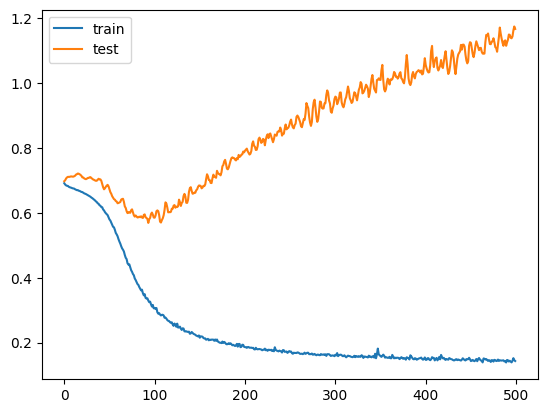

In [24]:
# Plot the training and validation loss over epochs

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


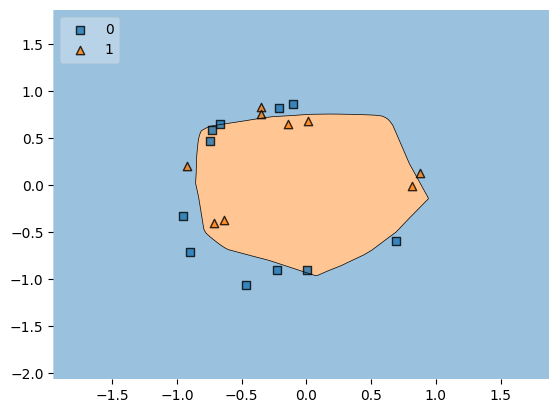

In [25]:
# Plot the decision regions of the trained model on the test data
# clf: the trained classifier model
# legend: specifies the position of the legend

plot_decision_regions(x_test, y_test, clf = model, legend=2)
plt.show()

## Early_Stopping

In [27]:
# Build a new sequential model (re-initialized for demonstration of Early Stopping)
# Add a dense layer with 128 units and ReLU activation, specifying the input dimension
# Add another dense layer with 128 units and ReLU activation
# Add the output layer with 1 unit and sigmoid activation for binary classification

model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
# Compile the model
# loss: binary_crossentropy is suitable for binary classification
# optimizer: adam is a common and effective optimizer
# metrics: accuracy is used to evaluate the model's performance


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# %%
# Define the EarlyStopping callback
# monitor: metric to monitor ('val_loss' for validation loss)
# min_delta: minimum change in the monitored metric to be considered an improvement
# patience: number of epochs with no improvement after which training will be stopped
# verbose: set to 1 to print messages when training is stopped
# mode: 'auto' infers the direction of improvement from the name of the monitored metric
# baseline: baseline value for the monitored metric to reach
# restore_best_weights: whether to restore model weights from the epoch with the best value of the monitored metric


callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [30]:
# Train the model with the EarlyStopping callback
# x_train, y_train: training data
# validation_data: data to evaluate the model on after each epoch
# epochs: maximum number of training iterations
# callbacks: list of callbacks to apply during training

history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=500, callbacks=callback)




Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.5016 - loss: 0.6894 - val_accuracy: 0.5500 - val_loss: 0.6939
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5102 - loss: 0.6856 - val_accuracy: 0.4000 - val_loss: 0.7014
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4922 - loss: 0.6878 - val_accuracy: 0.4000 - val_loss: 0.7086
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5445 - loss: 0.6840 - val_accuracy: 0.4500 - val_loss: 0.7069
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6078 - loss: 0.6771 - val_accuracy: 0.4000 - val_loss: 0.7088
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5680 - loss: 0.6784 - val_accuracy: 0.4000 - val_loss: 0.7084
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5672 - loss: 0.6722 - val_accuracy: 0.4000 - val_loss: 0.7086
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5648 - loss: 0.6684 - val_accuracy: 0.4000 - val_loss

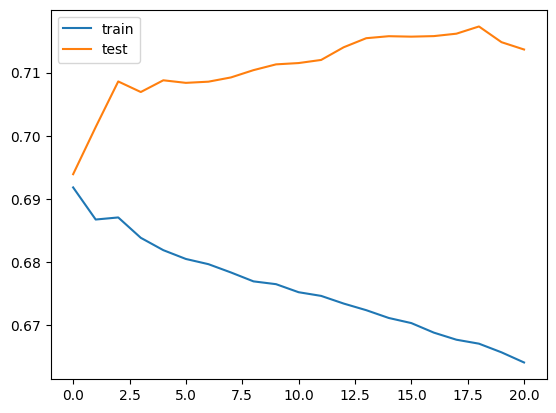

In [31]:
# Plot the training and validation loss over epochs

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


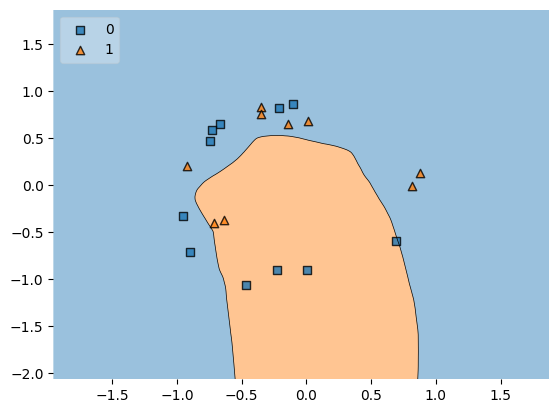

In [32]:
# Plot the decision regions of the trained model with Early Stopping on the test data
# clf: the trained classifier model
# legend: specifies the position of the legend

plot_decision_regions(x_test, y_test, clf = model, legend=2)
plt.show()